## Quantum Teleportation
Based on Michael Nielson's video series: https://www.youtube.com/watch?v=3wZ35c3oYUE

In [1]:
import math
import numpy as np
from pyquil.quil import Program
from pyquil.api import QVMConnection
from pyquil.gates import H, X, Z, CNOT

qvm = QVMConnection()

Quantum Teleportation is "teleporting" the state from (like most texts call it), Alice ($q_0$), to Bob ($q_2$).  Why do we need this?  Can't we just copy the state over?  The answer is no we cannot due to the no cloning theorem in quantum mechanics.  A work around is using quantum teleportation to get Alice's wavefunction.  To do this we need an intermidate qubit (unfortunately no name was given to this one), $q_1$.  Using the quantum circuit below...

![Tele](tele.png)

where Alice is $\psi$ in this case and Bob is the last qubit.  That last instruction for Bob is dependant on what the measurements of the above is.  Here is a quick table without getting into too much math (for video of proof visit link above) ...

![Table](bob_trans.png)

So now all thats left is to program this circuit.  We will let the user define p(0) and p(1) which are $\left|  \alpha  \right| ^2 $ and $\left|  \beta  \right| ^2 $ respectively where...

$$ \psi = \alpha \lvert 0 \rangle + \beta \lvert 1 \rangle $$

Our teleport function will return Bob's wavefunction which should be equivalent to Alice's initial wavefunction and therefore showing our quantum teleporter works (No we still cannot teleport ourselves unfortunately)!


In [2]:
#creates a unitary matrix (based heavily on the Hadamard) to be made into a gate to create Alice's inital state
def AliceMatrix(p0, p1):
    probs = np.array(([math.sqrt(p0), -math.sqrt(p1)], 
                      [math.sqrt(p1), math.sqrt(p0)]))
    return probs

In [10]:
def tele(p0, p1):
    
    #getting the unitary prob matrix
    probs_matrix = AliceMatrix(p0, p1)
    
    #creating that gate
    p = Program().defgate("Pr", probs_matrix)
    
    #pre-measurement instructions
    p += Program(("Pr", 0), H(1), CNOT(1, 2), CNOT(0, 1), H(0)) 
    
    #measure Alice and q1
    p.measure(0, [0])
    p.measure(1, [1])
    
    #checking state, then applying appropriate transformation
    p.if_then(1, X(2))
    p.if_then(0, Z(2))
    
    #printing wavefunction at the end of the circuit
    wavefunction = qvm.wavefunction(p)
    print("Wavefunction: ", wavefunction)
    return wavefunction.plot() 

Pr(0) + Pr(1) must equal 1

In the final wavefunction we will see that the term with the leading 0, which is Bob's qubit place, is equivalent to Alices $\alpha$ term.  And the term with the leading 1 is equivalent to Alice's $\beta$

Have fun teleporting and testing other probabilities!

Pr(0): .5
Pr(1): .5
Wavefunction:  (0.7071067812+0j)|001> + (-0.7071067812+0j)|101>


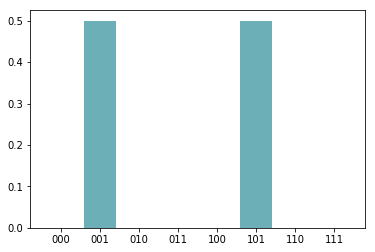

In [11]:
pr0 = float(input("Pr(0): "))
pr1 = float(input("Pr(1): "))
tele(pr0, pr1)

In [ ]:
Based